In [53]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [55]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [56]:
# variablat kategorike jane:
# sex, smoker, region

temp = df['sex'].astype('category')
df['sex'] = df['sex'].astype('category').cat.codes
df['smoker'] = df['smoker'].astype('category').cat.codes
df['region'] = df['region'].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int8   
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int8   
 5   region    1337 non-null   int8   
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 56.1 KB


In [57]:
dict(enumerate(temp.cat.categories))

{0: 'female', 1: 'male'}

In [58]:
# ndertoj variablat e vecuara
X = df.drop(columns='charges')  # variablat e pavarura # vetem charges eshte variabli i varur
y = df['charges']  #  variabli i varur

In [59]:
# ndajme filen te test dhe train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [60]:
# ndertoj modelin
from sklearn.linear_model import LinearRegression

multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)


LinearRegression()

#### Train Data

In [61]:
y_predict_train = multi_linear_model.predict(X_train)

Text(0, 0.5, 'predict data')

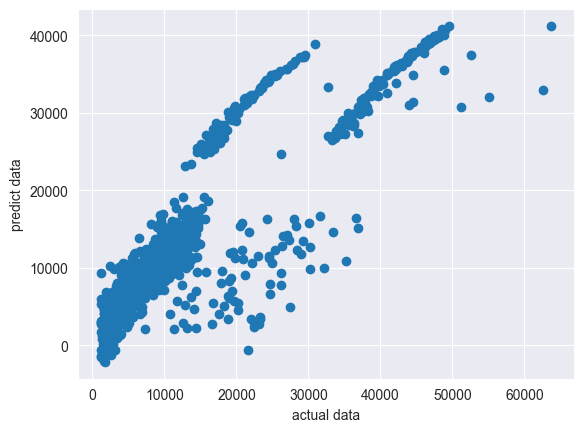

In [62]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_predict_train)
plt.xlabel("actual data")
plt.ylabel('predict data')

In [63]:
from sklearn.metrics import r2_score

r2_sc = r2_score(y_train, y_predict_train)
r2_sc

0.7633819996181807

#### Test Data

In [64]:
y_predict_test = multi_linear_model.predict(X_test)

Text(0, 0.5, 'predict data')

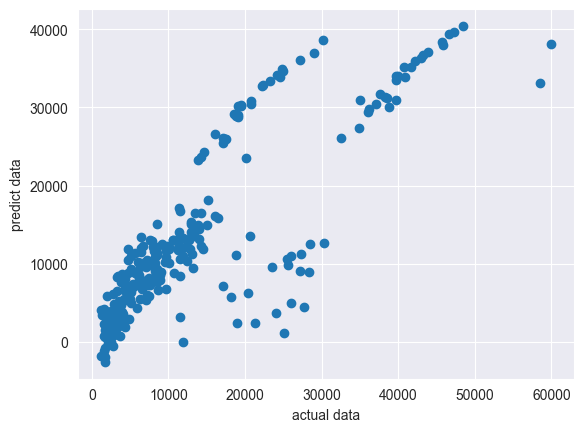

In [65]:
plt.scatter(y_test, y_predict_test)
plt.xlabel("actual data")
plt.ylabel('predict data')

In [66]:
from sklearn.metrics import r2_score

r2_sc = r2_score(y_test, y_predict_test)
r2_sc

0.6980257045399786

<AxesSubplot:xlabel='charges'>

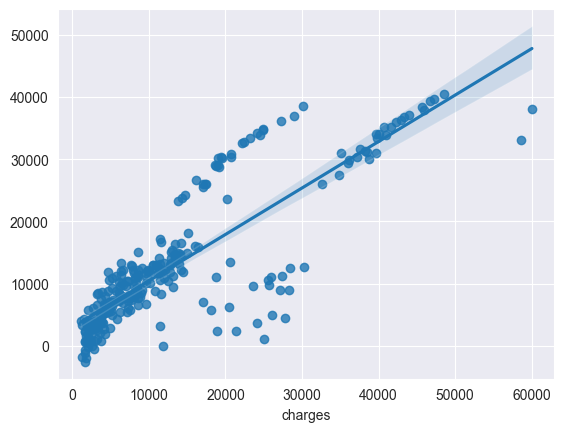

In [67]:
import seaborn as sns

sns.regplot(x=y_test, y=y_predict_test)